# Work Flow
1. loading and exploring the data 
2. dataframe preprocessing
3. preliminary statistical analysis
4. Data splitting
5. preliminary visual analysis
6. train benchmark model
7. text preprocessing
8. feature extraction and training model using pipeline 
9. Optimization
10. Evaluation

In [52]:
from IPython.display import display

# 1) Loading and exploring the data 

In [1]:
## loading data
import pandas as pd 
import warnings
warnings.filterwarnings('ignore') #remove warning 
#I will use the three data files
data1 = pd.read_csv('train.csv')
data2=pd.read_csv('test_with_solutions.csv')
data3=pd.read_csv('impermium_verification_labels.csv')
pd.set_option('display.max_colwidth',-1) #increase the maximum words in each row to show the whole Comment

print(data1.head())
print(data2.head())
print(data3.head())

   Insult             Date  \
0  1       20120618192155Z   
1  0       20120528192215Z   
2  0       NaN               
3  0       NaN               
4  0       20120619094753Z   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Comment  
0  "You fuck your dad."                                                              

# 2) DataFrame preprocessing

In [5]:
##dataframe preprocessing 
#remove the unwanted columns
data1.drop(['Date'],axis=1,inplace=True)
data2.drop(['Date','Usage'],axis=1,inplace=True)
data3.drop(['id','Date','Usage'],axis=1,inplace=True)
print(data1.head())
print(data2.head())
print(data3.head())

   Insult  \
0  1        
1  0        
2  0        
3  0        
4  0        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Comment  
0  "You fuck your dad."                                                                                                                                                                    

# 3) preliminary Statistical Analysis

In [6]:
##Data analysis
#Statistically
data=pd.concat([data1,data2,data3],ignore_index=True) #concatenating the three datasets int one 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8829 entries, 0 to 8828
Data columns (total 2 columns):
Insult     8829 non-null int64
Comment    8829 non-null object
dtypes: int64(1), object(1)
memory usage: 138.0+ KB


In [7]:
import numpy as np 
print(data['Insult'].value_counts()) #number of insults and non-insults
data.describe(np.arange(0.1,1.,0.1)) #percentage of each class

0    6010
1    2819
Name: Insult, dtype: int64


,Insult
count,8829.000000
mean,0.319289
std,0.466227
min,0.000000
10%,0.000000
20%,0.000000
30.0%,0.000000
40%,0.000000
50%,0.000000
60%,0.000000


From the first analysis it's obvious that the two classes in the data are imbalanced more than 60% of the data are non-insults, So we can't use accuracy  
Fortunately there isn't any null data 

# 4) Splitting the data

In [8]:
##Splitting data
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['Comment'],data['Insult'],test_size=0.2,random_state=0)
print('The number of rows in the whole dataset: {}'.format(data.shape[0]))
print('The number of rows in the train dataset: {}'.format(x_train.shape[0]))
print('The number of rows in the test dataset: {}'.format(x_test.shape[0]))

The number of rows in the whole dataset: 8829
The number of rows in the train dataset: 7063
The number of rows in the test dataset: 1766


# 5) Visual preliminary data analysis

In [3]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from collections import Counter
# helping functions to implement cloud of words and common word counter 

def cloud_of_words(data):
    cloud_word = WordCloud(width=600,height=600,collocations=False).generate(data) # generate wordcloud from instance using data
    plt.figure(figsize=(10,8),facecolor='k')
    plt.imshow(cloud_word)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
def bad_cloud_words(x,y):
    #collect badwordsand put them in one string for cloud generator
    stop_set=set(stopwords.words('english')) # stopwords in english like('the','a'..etc)
    insult = x[y==1] 
    not_insult = x[y==0]
    bad_words=''
    # s=SnowballStemmer('english')
    for tweet in insult:
        lower_tweet=tweet.lower() #lowerize all words
        words=word_tokenize(lower_tweet) 
        for word in words:
            if word not in stop_set:
                bad_words+=word+' '
    cloud_of_words(bad_words)
def good_cloud_words(x,y):
    stop_set=set(stopwords.words('english'))
    insult = x[y==1]
    not_insult = x[y==0]
    good_words=''
    for tweet in not_insult:
        lower_tweet=tweet.lower()
        words=word_tokenize(lower_tweet)
        for word in words:
            if word not in stop_set:
                good_words+=word+' '
    cloud_of_words(good_words)
def good_words_count(X,y):
    print(Counter(" ".join(X[y==0]).split()).most_common(100))
def bad_words_count(X,y):
    print(Counter(" ".join(X[y==1]).split()).most_common(100))


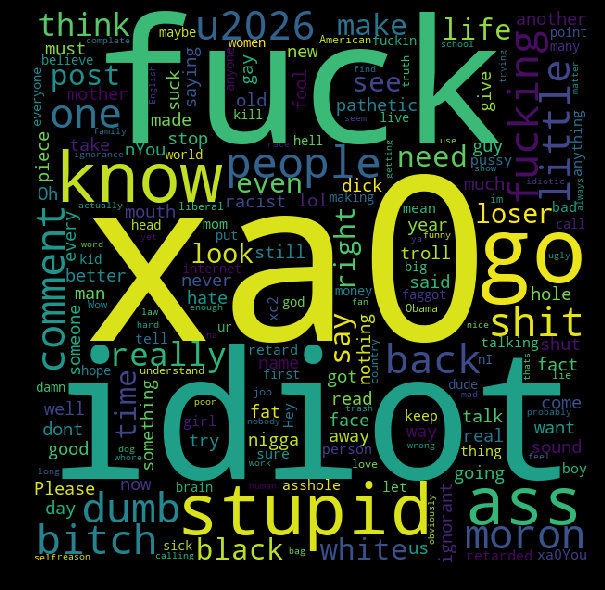

In [18]:
#train data analysis
bad_cloud_words(x_train,y_train)

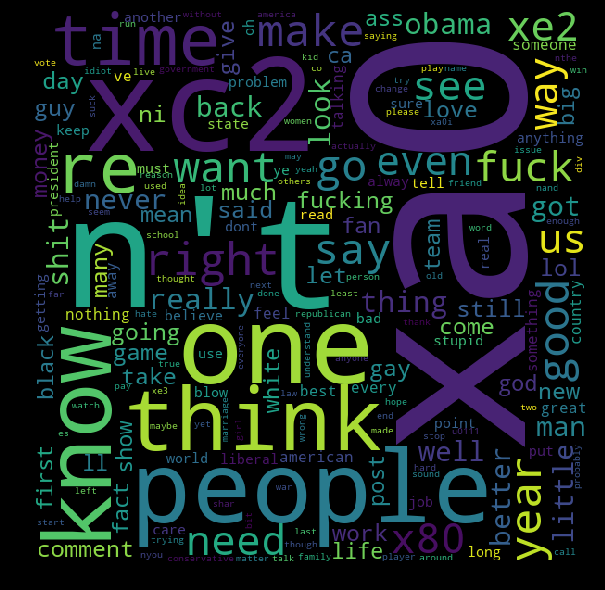

In [20]:
good_cloud_words(x_train,y_train)

In [10]:
good_words_count(x_train,y_train)

[('the', 5317), ('to', 3676), ('a', 3053), ('and', 2959), ('you', 2677), ('of', 2456), ('is', 1988), ('in', 1644), ('that', 1644), ('are', 1547), ('I', 1437), ('for', 1216), ('your', 1074), ('it', 1017), ('have', 986), ('on', 962), ('be', 906), ('not', 874), ('with', 783), ('like', 704), ('they', 700), ('this', 687), ('as', 637), ('he', 610), ('was', 589), ('all', 585), ('will', 556), ('just', 542), ('or', 499), ('about', 494), ('but', 492), ('his', 477), ('what', 450), ('we', 448), ('at', 442), ('would', 429), ('so', 424), ('get', 421), ('who', 416), ('if', 411), ('do', 408), ('their', 408), ('can', 397), ('from', 395), ('an', 393), ('out', 389), ('my', 385), ('has', 378), ('up', 377), ("don't", 375), ('when', 370), ('by', 359), ('one', 355), ('people', 348), ('"I', 321), ('think', 318), ('more', 315), ('no', 303), ('know', 302), ('me', 301), ('because', 297), ('-', 277), ('some', 251), ('how', 247), ('"', 242), ('The', 242), ('should', 241), ('than', 240), ('them', 237), ('You', 233)

In [11]:
bad_words_count(x_train,y_train)

[('you', 2119), ('a', 1434), ('the', 1240), ('to', 1043), ('your', 986), ('and', 955), ('are', 902), ('of', 728), ('is', 504), ('that', 457), ('in', 434), ('I', 402), ('like', 357), ('for', 327), ('have', 299), ('on', 294), ('be', 277), ('it', 267), ('not', 266), ('with', 244), ('just', 241), ('You', 238), ('"You', 226), ('as', 226), ('an', 223), ('about', 208), ('all', 201), ('this', 197), ('get', 192), ("don't", 176), ('or', 168), ('so', 167), ('what', 166), ('up', 161), ('do', 152), ('know', 152), ('who', 151), ('fuck', 143), ('my', 138), ('no', 137), ('was', 137), ('go', 136), ('out', 131), ('if', 129), ('i', 129), ('"', 127), ('but', 124), ('people', 123), ('stupid', 122), ('little', 122), ("you're", 121), ('he', 119), ('fucking', 118), ('they', 116), ('ass', 115), ('back', 114), ('from', 113), ('because', 112), ('at', 111), ('can', 111), ('one', 107), ('would', 106), ('u', 105), ('me', 103), ('really', 102), ('think', 102), ('his', 100), ('when', 99), ('will', 96), ('YOU', 92), (

by analyzing the data before preprocessing :
* you can see that the full of non-ascii characters and should be removed manually
* apostrophes and slashes are very common 
* some common words are recorded two times one with double qoutation like this 'I' and '"I'
* a lot of stop words iin the most common used words 
* from exploring the raw data :
    1. we should remove double quotations, dots , colons ,brakets and other similar characters
    2. remove exclamation and question marks 
    3. remove numbers 
    4. remove slashes and string commands like newline command \n and tab \t
    5. remove mentions and urls
    6. remove html code 
    7. replace words with apostrophe with the original word like n't should be not 
    8. replace short words like u with you and em instead of them 
    9. remove these funny characters like \xa0 and \xc2
    10. use badwords vocab to replace the bad word derivatives with thier original word
    11. use stemmer to stem these words
    12. remove stop words

# 6) Training benchmark model

In [16]:
##benchmark model
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,log_loss,make_scorer
from sklearn.cross_validation import ShuffleSplit

##helping function to generate records dictionary for each pipeline output which takes both the vectorizer and model and 
##parameters on which gridsearch will run 

count_vector_records=[]
def use_pipeline(vect,clf,params={}):
    cv_sets = ShuffleSplit(x_train.shape[0], n_iter =10, test_size = 0.20, random_state = 0)
    scoring_fnc = make_scorer(f1_score)
    pl = Pipeline([('vect',vect),('clf',clf)])
    pl_grid = GridSearchCV(pl,params,scoring_fnc,cv=cv_sets,n_jobs=-1)
    pl_grid.fit(x_train,y_train)
    pred_train=pl_grid.predict(x_train)
    pred_test=pl_grid.predict(x_test)
    #print(pl_grid.best_score_)
    print("best parameters for classifiers",clf.__class__.__name__,'and',vect.__class__.__name__,'is',pl_grid.best_params_)
    records={}
    
    records['model']=clf.__class__.__name__
    records['train f1']=f1_score(y_train,pred_train)
    records['test f1']=f1_score(y_test,pred_test)
    records['train auc-roc']=roc_auc_score(y_train,pred_train)
    records['test auc-roc']=roc_auc_score(y_test,pred_test)
    records['train log loss']=log_loss(y_train,pred_train)
    records['test log loss']=log_loss(y_test,pred_test)

    return(records,pl_grid)

##train and record the results of benchmark models

benchmark_records,bench_model = use_pipeline(CountVectorizer(),MultinomialNB())
#count_vector_records.append(benchmark_records)
alt_benchmark_records,alt_bench_model = use_pipeline(CountVectorizer(),DummyClassifier())
#count_vector_records.append(alt_benchmark_records)
#count_vector_records.append(benchmark_records,alt_benchmark_records)
pprint.pprint(benchmark_records)
pprint.pprint(alt_benchmark_records)

best parameters for classifiers MultinomialNB and CountVectorizer is {}
best parameters for classifiers DummyClassifier and CountVectorizer is {}
{'model': 'MultinomialNB',
 'test auc-roc': 0.7613736341705689,
 'test f1': 0.6758893280632411,
 'test log loss': 6.414956857092241,
 'train auc-roc': 0.9008129610319392,
 'train f1': 0.8617921458016924,
 'train log loss': 3.115033897868587}
{'model': 'DummyClassifier',
 'test auc-roc': 0.4998909577050331,
 'test f1': 0.322524101665206,
 'test log loss': 15.118232610318582,
 'train auc-roc': 0.5012146139883367,
 'train f1': 0.3266550522648084,
 'train log loss': 15.120367433019815}


Actually the benchmark scores a very good scores (ofcourse I mean the MultinomialNB) and it's logloss only 6.4 , while the dummy classifier was too bad compared to naive bayes  
We will use Multinomial throughtout the code as our benchmark

# 7) Text preprocessing

In [17]:
##Preprocessing 
#use a text file contains most of insults and thier derivatives and add them to dict bad_txt in form of {word:it's derivatives}
with open("badwords.txt",'r') as f :
    bad_txt = {}
    for line in f:
        sp = line.strip().lower().split(",")
        if len(sp) == 2:
            bad_txt[sp[0].strip()] = sp[1].strip()

In [18]:
import re
from nltk.stem.snowball import SnowballStemmer,PorterStemmer
##The whole text is preprocessed here 

s=SnowballStemmer('english',ignore_stopwords=True)
# s=PorterStemmer()
stop_set=set(stopwords.words('english'))
def preprocess(X):
    unic = re.compile(r'\\xa0')
    uni = re.compile(r'\\+u[a-zA-Z0-9]*')
    new_line = re.compile(r'\\n')
    slash = re.compile(r'\\')
    tab = re.compile(r'\\t')
    url = re.compile(r"http[^\s]*")
    mention_regex = '@[\w\-]+'
    cleanr = re.compile('<.*?>')
    white = re.compile(r' +')
    dots = re.compile(r'.+')
    extra = re.compile(r',')
    numbers = re.compile(r'[0-9]')
    bad = re.compile(r'[*$%&#@]+')
    u=re.compile(r'n[0-9]+')
    final=re.compile(r'[A-Z][^A-Z]*')
    X=X.apply(lambda x:s.stem(x))
    X=X.apply(lambda x:''.join(i for i in x if ord(i)<128)) #remove non-ascii characters
    #X=X.apply(lambda x:x.strip().strip('"')) #
    X=X.apply(lambda x:x.replace('"'," "))
    X=X.apply(lambda x:x.replace("xa0"," "))
    X=X.apply(lambda x:x.replace("xe1c"," "))
    X=X.apply(lambda x:x.replace("xc2"," "))
    X=X.apply(lambda x:x.replace("u2026"," "))
    X=X.apply(lambda x:x.replace("xe3"," "))
    X=X.apply(lambda x:x.replace("x81"," "))
    X=X.apply(lambda x:x.replace("x80"," "))
    X=X.apply(lambda x:x.replace("xc3"," "))
    X=X.apply(lambda x:x.replace("u01b0"," "))
    X=X.apply(lambda x:x.replace("u0111"," "))
    X=X.apply(lambda x:x.replace("xbf"," "))
    X=X.apply(lambda x:x.replace("xb"," "))
    X=X.apply(lambda x:x.replace("xaf"," "))
    X=X.apply(lambda x:x.replace("xe"," "))
    X=X.apply(lambda x:x.replace("xa"," "))
    X=X.apply(lambda x:x.replace("u1ea1n"," "))
    X=X.apply(lambda x:x.replace("u1ed1ng"," "))
    X=X.apply(lambda x:x.replace("u1ec3u"," "))
    X=X.apply(lambda x:x.replace("xecnh"," "))
    X=X.apply(lambda x:x.replace("xf3"," "))
    X=X.apply(lambda x:x.replace("xf4n"," "))
    X=X.apply(lambda x:x.replace("xf4ng"," "))
    X=X.apply(lambda x:x.replace("u1ed9ng"," "))

    X=X.apply(lambda x:re.sub(u,' ',x))
    X=X.apply(lambda x:x.replace('"'," "))
    X=X.apply(lambda x:x.replace(')'," "))
    X=X.apply(lambda x:x.replace('('," "))
    #X=X.apply(lambda x:x.strip().strip("'"))
    X=X.apply(lambda x:x.replace("'"," "))
    X=X.apply(lambda x:re.sub(numbers,' ',x))
    X=X.apply(lambda x:re.sub(bad,' ',x))
    X=X.apply(lambda x:re.sub(uni,' ',x))
    X=X.apply(lambda x:re.sub(new_line,' ',x))
    X=X.apply(lambda x:re.sub(tab,' ',x))
    X=X.apply(lambda x:re.sub(url,' ',x))
    X=X.apply(lambda x:re.sub(mention_regex,' ',x))
    X=X.apply(lambda x:re.sub(cleanr,' ',x))
    X=X.apply(lambda x:re.sub(slash,' ',x))
    X=X.apply(lambda x:x.replace(' da '," the "))
    X =X.apply(lambda x:x.replace(" u "," you "))
    X =X.apply(lambda x:x.replace(" em "," them "))
    X=X.apply(lambda x:x.replace(" yo "," you "))
    X=X.apply(lambda x:x.replace(" ur "," you "))
    X=X.apply(lambda x:x.replace("can't"," cannot "))
    X=X.apply(lambda x:x.replace("don't"," donot "))
    X=X.apply(lambda x:x.replace("'ll "," will "))
    X=X.apply(lambda x:x.replace("'ve "," have "))
    X=X.apply(lambda x:x.replace("'d "," would "))
    X=X.apply(lambda x:x.replace(" won't "," will not "))
    X=X.apply(lambda x:x.replace(" i'm "," i am "))
    X=X.apply(lambda x:x.replace("'s "," is "))
    X=X.apply(lambda x:x.replace("'re "," are "))
    X=X.apply(lambda x:x.replace(" outta "," out of "))
#     X=X.apply(lambda x:x.replace("ur","you"))
    X=X.apply(lambda x:x.replace("."," "))
    X=X.apply(lambda x:x.replace(","," "))
    X=X.apply(lambda x:x.replace(":"," "))
    X=X.apply(lambda x:x.replace("!"," "))
    X=X.apply(lambda x:x.replace("*"," "))
    X=X.apply(lambda x:x.replace("-"," "))
    X=X.apply(lambda x:x.replace("/"," "))
    X=X.apply(lambda x:x.replace("?"," "))

    #     #X=X.apply(lambda x:' '.join(x.split('.')))
    #X=X.apply(lambda x:''.join(x.split(','))) 
#     X=X.apply(lambda x:re.sub(r'\b\w{1,3}\b', '', x))
#     X.str.replace(X.str.findall('\w{4,}'),' ')
    for key,value in bad_txt.items():
#         print(type(value))
        kpad = " "+key+" "
        vpad = " "+value+" "
        X=X.apply(lambda x:x.replace(kpad,vpad))
   # X=X.apply(lambda x:re.sub(final,' ',x))
#     X=X.apply(lambda x:"".join(re.findall('[a-z][^a-z]*',x)))
    for word in stop_set:
        X=X.apply(lambda x:x.replace(" "+word+" "," "))
    X=X.apply(lambda x:re.sub(white,' ',x))

    return (X)

x_train=preprocess(x_train)
x_test=preprocess(x_test)
print(x_train.tail(10))


2599     saying thing saying wealthy pay ta higher marginal rate redistribution wealth redistribution wealth pay federal ta nh nh gets less back residents pay ta whereas poor righwing redneck southerners get back pay less productive us less healthy us want fair tax system try idea; flat income tax individuals corporations deductions loopholes etc individuals get generous k personal e mption per taxpayer k per dependent thats fam parents work k income e mpt k pay remaining k tax bill effective tax rate fam parents work k income e mpt k pay remaining k tax bill effective tax rate fam dad works income e mpt k pay remaining k tax bill effective tax rate corporations pay net operating income get e mpt direct costs production best part plan revenue neutral including fica ta                                                                                                                                                                                                                              

we have nearly cleaned all the comments, there still some unwanted letters left, mostly words with length one or two  
They will be removed using the vectorizer anyway 

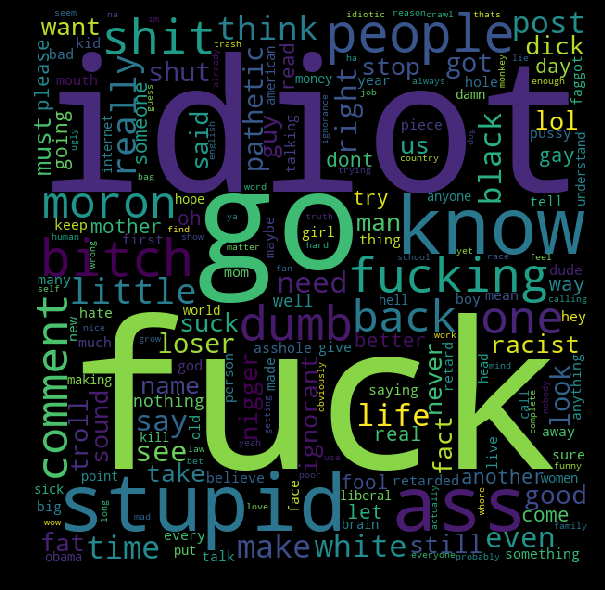

[('like', 401), ('fuck', 325), ('get', 247), ('go', 238), ('idiot', 229), ('stupid', 198), ('know', 182), ('ass', 179), ('people', 163), ('bitch', 153), ('fucking', 151), ('dumb', 149), ('shit', 145), ('one', 138), ('little', 128), ('back', 128), ('really', 123), ('moron', 121), ('would', 117), ('think', 113), ('life', 95), ('time', 88), ('even', 87), ('see', 86), ('white', 85), ('make', 81), ('black', 81), ('comment', 79), ('shut', 78), ('pathetic', 77), ('need', 77), ('say', 76), ('right', 75), ('good', 72), ('man', 70), ('still', 69), ('got', 67), ('stop', 67), ('loser', 67), ('lol', 67), ('look', 65), ('never', 65), ('ignorant', 64), ('nigger', 63), ('us', 63), ('dick', 62), ('racist', 61), ('said', 61), ('must', 59), ('fat', 59), ('want', 59), ('another', 59), ('dont', 58), ('comments', 58), ('post', 58), ('name', 57), ('oh', 57), ('take', 55), ('suck', 55), ('way', 54), ('real', 53), ('mother', 53), ('please', 51), ('better', 51), ('going', 50), ('read', 50), ('fool', 49), ('gay'

In [19]:
##Data Analysis after preprocessing 
bad_cloud_words(x_train,y_train)
bad_words_count(x_train,y_train)

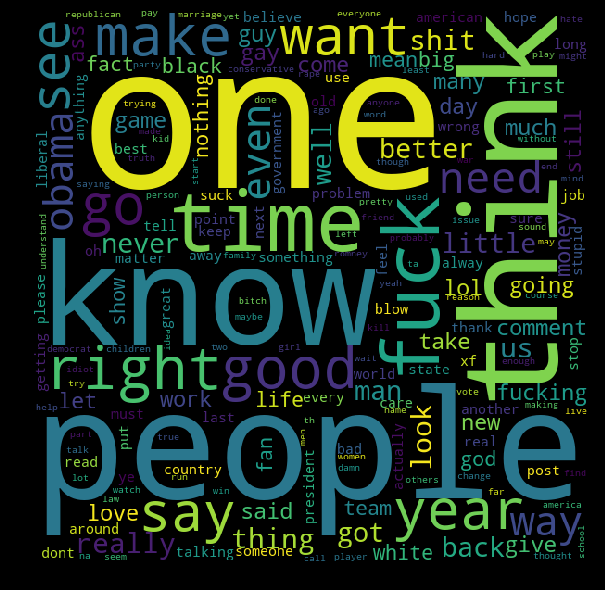

[('like', 812), ('get', 482), ('people', 477), ('one', 468), ('would', 455), ('know', 371), ('think', 350), ('fuck', 294), ('good', 283), ('x', 281), ('time', 276), ('go', 271), ('right', 270), ('see', 243), ('make', 235), ('even', 230), ('really', 226), ('us', 226), ('obama', 224), ('shit', 219), ('want', 215), ('way', 212), ('say', 210), ('c', 197), ('man', 196), ('well', 195), ('never', 194), ('e', 194), ('back', 192), ('better', 188), ('little', 186), ('fucking', 183), ('going', 183), ('much', 178), ('still', 176), ('need', 174), ('got', 170), ('look', 161), ('many', 156), ('years', 152), ('said', 150), ('love', 148), ('lol', 147), ('money', 147), ('could', 142), ('let', 141), ('also', 137), ('ass', 136), ('r', 136), ('take', 133), ('gay', 133), ('year', 132), ('give', 127), ('first', 127), ('life', 124), ('n', 123), ('come', 121), ('god', 121), ('big', 121), ('game', 121), ('work', 120), ('nothing', 118), ('something', 117), ('thing', 116), ('b', 114), ('country', 114), ('ever', 1

In [20]:
good_cloud_words(x_train,y_train)
good_words_count(x_train,y_train)

most of the common words now, are very usable and clean without any stopwords or formatting characters  
Also notice that :
**words like 'like' it's frequency increased from 357 in bad words and 703 in good words to 401 and 812 , maybe some words contained 's' like 'likes' or in past like 'liked',this will help alot in training**

# 8) Feature extraction and training model using pipeline

In [21]:
## feature extrction and training model 
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
##form table of records 
def form_table(records):
    names = [x["model"] for x in records]
    train_f1 = [x["train f1"] for x in records]
    train_auc_roc = [x["train auc-roc"] for x in records]
    train_log_loss = [x["train log loss"] for x in records]
    test_f1 = [x["test f1"] for x in records]
    test_auc_ros = [x["test auc-roc"] for x in records]
    test_log_loss = [x["test log loss"] for x in records]
    df = pd.DataFrame(index=names, 
                    data = {
                            "train f1": train_f1,
                            "train auc-roc": train_auc_roc,
                            "train log loss": train_log_loss,
                            "test f1": test_f1,
                            "test auc-roc":test_auc_ros,
                            "test log loss":test_log_loss
                      }
                  )
    return(df)

In [22]:
from IPython.display import display # use it in printing to have a nicer table 
## helping function to execute classifier on 4 chosen models, it's Inputs:vectorizer and parametets to grid search over
## it returns: the records and the models
def execute_classifiers(vect,params={}):
    records = [] 
    lr_records,lr_model = use_pipeline(vect(),LogisticRegression(random_state=0),params)
    records.append(lr_records)
    sgd_records,sgd_model = use_pipeline(vect(),SGDClassifier(random_state=0),params)
    records.append(sgd_records)
    lsv_records,lsv_model = use_pipeline(vect(),LinearSVC(random_state=0),params)
    records.append(lsv_records)
    gb_records,gb_model = use_pipeline(vect(),GradientBoostingClassifier(random_state=0),params)
    records.append(gb_records)
    df=form_table(records)
    return(df,lr_model,sgd_model,lsv_model,gb_model)

In [23]:
##Evaluation functions
import matplotlib.pyplot as plt
##Some helping functions to visualize the barplot of auc-roc,F1 and log-loss of all models
def visual(df):
    fig=plt.figure(figsize=(20,10))
    n=df.shape[0]
    ax=df[['test auc-roc','test f1']].plot(kind="bar",title="Performance of each model")
    x = list(range(n))
    y =np.ones(n)*benchmark_records['test auc-roc']
    plt.plot(x,y,color='b')
    x = list(range(n))
    y =np.ones(n)*benchmark_records['test f1']
    plt.plot(x,y,color='tab:orange')
    ax.set_ylabel("Percentage", fontsize='large')
    ax.legend(['Benchmark roc-auc','Benchmark f1','test auc-roc','test f1'])
    
def log_loss_visual(df):
    n=df.shape[0]
    ax=df[['test log loss']].plot(kind="bar",title="log-loss of each model")
    x = list(range(n))
    y =np.ones(n)*benchmark_records['test log loss']
    plt.plot(x,y,color='b')
    ax.set_ylabel("Loss", fontsize='large')
    ax.legend(['Benchmark log loss','model log loss'])

## CountVectorizer

In [24]:
##training models and feature extraction 
##try countVectorizer as vectorizer for all models
df_count_vect,lr_count_model,sgd_count_model,svc_count_model,gb_count_model=execute_classifiers(CountVectorizer)
display(df_count_vect)

best parameters for classifiers LogisticRegression and CountVectorizer is {}
best parameters for classifiers SGDClassifier and CountVectorizer is {}
best parameters for classifiers LinearSVC and CountVectorizer is {}
best parameters for classifiers GradientBoostingClassifier and CountVectorizer is {}


,test auc-roc,test f1,test log loss,train auc-roc,train f1,train log loss
LogisticRegression,0.757628,0.672936,6.121577,0.926295,0.914512,1.794674
SGDClassifier,0.736567,0.638590,7.216831,0.944402,0.930809,1.501272
LinearSVC,0.742349,0.646776,7.177719,0.987970,0.986016,0.308078
GradientBoostingClassifier,0.679800,0.536765,7.392805,0.694977,0.566251,7.139562


<Figure size 1440x720 with 0 Axes>

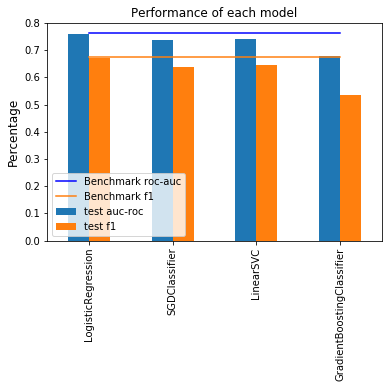

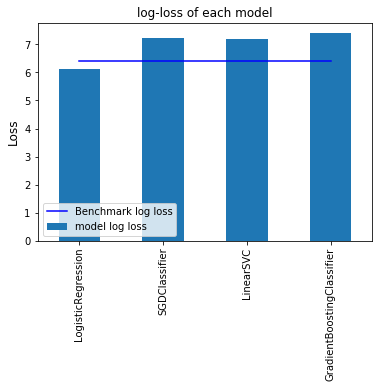

In [25]:
## Output Analysis
visual(df_count_vect)
log_loss_visual(df_count_vect)

## TfidfVectorizer

the difference betweent this and last vectroizer that CountVectorizer just counts the word frequencies.while the TfidfTransformer transforms a count matrix to a normalized tf or tf-idf representation

In [28]:
##The same for TfidfVectorizer
df_tfidf,lr_tfidf_model,sgd_tfidf_model,svc_tfidf_model,gb_tfidf_model=execute_classifiers(TfidfVectorizer)
display(df_tfidf)

best parameters for classifiers LogisticRegression and TfidfVectorizer is {}
best parameters for classifiers SGDClassifier and TfidfVectorizer is {}
best parameters for classifiers LinearSVC and TfidfVectorizer is {}
best parameters for classifiers GradientBoostingClassifier and TfidfVectorizer is {}


,test auc-roc,test f1,test log loss,train auc-roc,train f1,train log loss
LogisticRegression,0.720466,0.612865,6.473595,0.776910,0.710153,5.193297
SGDClassifier,0.761838,0.679089,6.062905,0.925684,0.911316,1.877808
LinearSVC,0.755908,0.669405,6.297601,0.980573,0.974574,0.562367
GradientBoostingClassifier,0.688705,0.553659,7.158112,0.700364,0.574887,6.870600


<Figure size 1440x720 with 0 Axes>

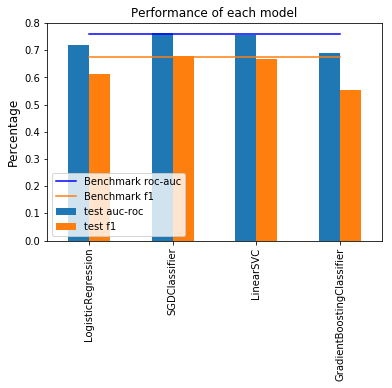

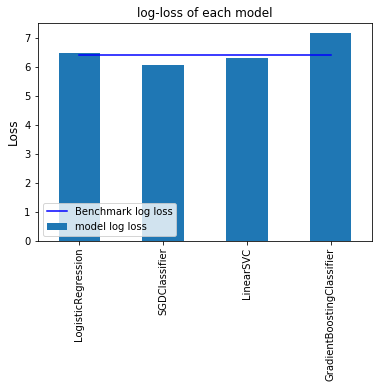

In [27]:
visual(df_tfidf)
log_loss_visual(df_tfidf)

## HashVectorizer 
We will apply a vectroizer called HashVectorizer, It's like countVectorizer and tfidVectorizer,it Converts a collection of text documents to a matrix of token occurrences
The main difference is that HashingVectorizer applies a hashing function to term frequency counts in each document, where TfidfVectorizer scales those term frequency counts in each document by penalising terms that appear more widely across the corpus more info [here](https://spark.apache.org/docs/latest/mllib-feature-extraction.html)  
The Advantages and Disadvantages according to sklearn documentation  
**Adv**:
* it is very low memory scalable to large datasets as there is no need to store a vocabulary dictionary in memory 

**DisAdv**:
* there is no way to compute the inverse transform which can be a problem when trying to introspect which features are most important to a model.
* no IDF weighting as this would render the transformer stateful.

In [29]:
##also for HashVectorizer
df_hash,lr_hash_model,sgd_hash_model,svc_hash_model,gb_hash_model=execute_classifiers(HashingVectorizer)
display(df_hash)

best parameters for classifiers LogisticRegression and HashingVectorizer is {}
best parameters for classifiers SGDClassifier and HashingVectorizer is {}
best parameters for classifiers LinearSVC and HashingVectorizer is {}
best parameters for classifiers GradientBoostingClassifier and HashingVectorizer is {}


,test auc-roc,test f1,test log loss,train auc-roc,train f1,train log loss
LogisticRegression,0.716097,0.605140,6.610500,0.767416,0.693701,5.540500
SGDClassifier,0.752099,0.664557,6.219364,0.884524,0.858567,2.914515
LinearSVC,0.764307,0.683333,5.945557,0.956477,0.946541,1.163853
GradientBoostingClassifier,0.683503,0.542751,7.216783,0.706989,0.587777,6.728788


<Figure size 1440x720 with 0 Axes>

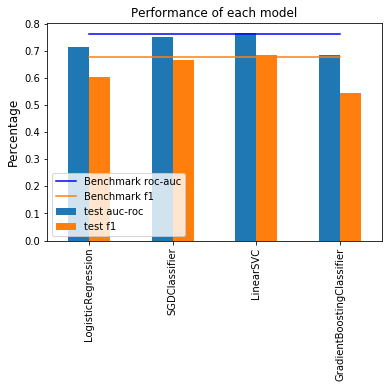

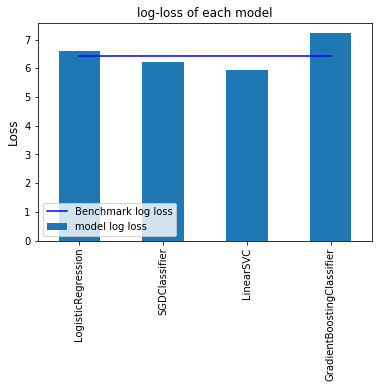

In [30]:
visual(df_hash)
log_loss_visual(df_hash)

# 9) Optimization

In [54]:
##Optimization
params ={ 
#          'vect__max_df': [0.5, 0.75],                         # ignore the proportion of document greater than
         'vect__ngram_range': [(1,3),(1, 4), (1, 5), (1, 6)],  # n-values for different n-grams to be extracted. All
         'vect__stop_words':['english',None],                  # Whether the english stopwords list is used or not
         'vect__analyzer':['char','word'],                     # Whether the feature should be made of word or character n-grams.
         'vect__sublinear_tf':[True,False],                    # Apply sublinear tf scaling
         'vect__min_df':[1,3,4]}                               # ignore ignore terms that have lower document frequency 
df_vect=execute_classifiers(TfidfVectorizer,params) #optimize each model with the following parameters
display(df_vect)

best parameters for classifiers LogisticRegression and TfidfVectorizer is {'vect__ngram_range': (1, 4), 'vect__stop_words': 'english', 'vect__sublinear_tf': True, 'vect__min_df': 3, 'vect__analyzer': 'char'}
best parameters for classifiers SGDClassifier and TfidfVectorizer is {'vect__ngram_range': (1, 5), 'vect__stop_words': None, 'vect__sublinear_tf': True, 'vect__min_df': 1, 'vect__analyzer': 'word'}
best parameters for classifiers LinearSVC and TfidfVectorizer is {'vect__ngram_range': (1, 3), 'vect__stop_words': None, 'vect__sublinear_tf': True, 'vect__min_df': 1, 'vect__analyzer': 'word'}
best parameters for classifiers GradientBoostingClassifier and TfidfVectorizer is {'vect__ngram_range': (1, 4), 'vect__stop_words': 'english', 'vect__sublinear_tf': True, 'vect__min_df': 1, 'vect__analyzer': 'char'}


,test auc-roc,test f1,test log loss,train auc-roc,train f1,train log loss
LogisticRegression,0.730289,0.630137,6.336695,0.782055,0.717385,5.159070
SGDClassifier,0.787848,0.713870,5.769552,0.995558,0.994046,0.132034
LinearSVC,0.787341,0.714709,5.652201,0.996648,0.995371,0.102693
GradientBoostingClassifier,0.695648,0.568396,7.158118,0.755326,0.674944,5.633404


<Figure size 1440x720 with 0 Axes>

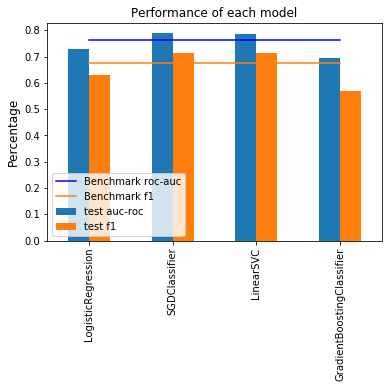

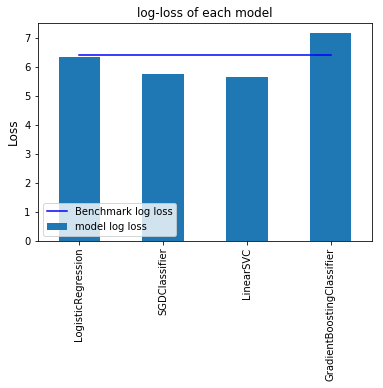

In [55]:
visual(df_vect)
log_loss_visual(df_vect)

The best two classifiers with tfidf are sgd and linearsvm we will carry on one final comparison to be sure which to choose 

In [133]:
sgd_params={'clf__n_jobs':[-1],                     # The number of CPUs to use
            'clf__alpha':[1e-4,1e-3,1e-2,0.1,1],    # Constant that multiplies the regularization term
            'clf__class_weight':['balanced',None],  # Weights associated with classe
            'clf__penalty':['l2','elasticnet'],     # which technique to calculate penalty
            'clf__fit_intercept':[True,False]}      # Whether the intercept should be estimated or not
svc_params={'clf__C':[0.01,0.1,1,10,100],           # 1/(regularization term) or the penalty
            'clf__fit_intercept':[True,False],      # Whether to calculate the intercept for this model
            'clf__class_weight':[None,'balanced']}  

def train_model(model1,model1_param,model2,model2_param,vect1_param={},vect2_param={}):
    params1 = {**vect1_param,**model1_param}
    params2 = {**vect2_param,**model2_param}
    records = [] 
    record1,pred1 = use_pipeline(TfidfVectorizer(),model1(random_state=0),params1)
    records.append(record1)
    record2,pred2 = use_pipeline(TfidfVectorizer(),model2(random_state=0),params2)
    records.append(record2)
    df=form_table(records) 
    return(df,pred1,pred2)

new_df,sgd_model,svc_model = train_model(SGDClassifier,sgd_params,LinearSVC,svc_params,params,params)
display(new_df)


best parameters for classifiers SGDClassifier and TfidfVectorizer is {'vect__sublinear_tf': True, 'clf__alpha': 0.0001, 'clf__class_weight': None, 'vect__min_df': 1, 'vect__analyzer': 'word', 'clf__penalty': 'l2', 'vect__ngram_range': (1, 3), 'vect__stop_words': None, 'clf__n_jobs': -1, 'clf__fit_intercept': True}
best parameters for classifiers LinearSVC and TfidfVectorizer is {'clf__C': 0.5, 'vect__stop_words': None, 'clf__class_weight': 'balanced', 'vect__min_df': 1, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 4), 'vect__sublinear_tf': True, 'clf__fit_intercept': True}


,test auc-roc,test f1,test log loss,train auc-roc,train f1,train log loss
SGDClassifier,0.788502,0.715543,5.691319,0.994909,0.993164,0.151595
LinearSVC,0.802894,0.729262,5.808683,0.996407,0.993418,0.146706


<Figure size 1440x720 with 0 Axes>

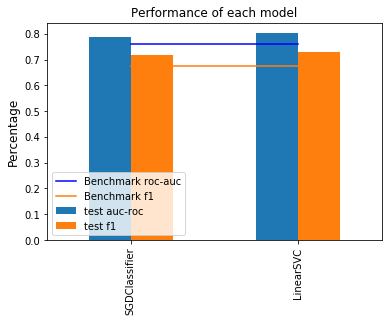

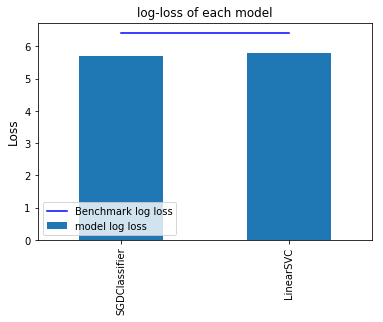

In [134]:
visual(new_df)
log_loss_visual(new_df)

It's decided here we will choose sgd with tfidfVectorizer as our model although both of them are very close   
but sgd has better scores with log-loss.

# 10) Evaluation

In [139]:
##Evaluation
# comparing the precision,recall and f1-score of chosen algorithm with the benchmark model
from sklearn.metrics import classification_report,confusion_matrix
print('Stochastic Gradient Descent')
print(classification_report(y_test,sgd_model.predict(x_test),target_names=['neutral','insult'])) 
print('----------------------------')
print('Benchmark model')
print(classification_report(y_test,bench_model.predict(x_test),target_names=['neutral','insult'])) 


Stochastic Gradient Descent
             precision    recall  f1-score   support

    neutral       0.86      0.91      0.88      1215
     insult       0.78      0.66      0.72       551

avg / total       0.83      0.84      0.83      1766

----------------------------
Benchmark model
             precision    recall  f1-score   support

    neutral       0.84      0.90      0.87      1215
     insult       0.74      0.62      0.68       551

avg / total       0.81      0.81      0.81      1766



The f1-score here is different than of that obtained before, I have found [here](https://stackoverflow.com/questions/33247834/classification-report-vs-f1-score-in-scikit-learns-classification-metrics?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa)  
The used here is averaged weighted f1-score  
**note**: we can use average='micro' parameter in ordinary f1-score to count the number of fp and fn regardless of thier value 


In [138]:
##Print the confusion matrix of each model 
print('Stochastic Gradient Descent')
print(confusion_matrix(y_test,sgd_model.predict(x_test)))
print('----------------------------')
print('Benchmark model')
print(confusion_matrix(y_test,bench_model.predict(x_test)))


Stochastic Gradient Descent
[[1109  106]
 [ 185  366]]
----------------------------
Benchmark model
[[1096  119]
 [ 209  342]]


The miscalssified comments improved:  
dropped from 328 misclasssified comments to 291  
FN from 209 to 185 and FP from 119 to 106   

Text(0.5,15,'predicted label')

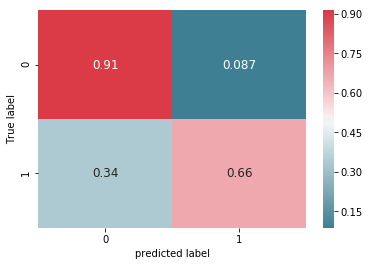

In [141]:
##Print the normalized confusion matrix of chosen model
import seaborn as sns 
conf_mat = confusion_matrix(y_test,sgd_model.predict(x_test))
conf_mat_normalized = conf_mat.astype('float')/conf_mat.sum(axis=1)[:,np.newaxis]
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(conf_mat_normalized,cmap=cmap,annot=True,annot_kws={'fontsize':12})
plt.ylabel('True label')
plt.xlabel('predicted label')

There are a lot of FN , about the third of the insults was classified as neutral .  
These are the comments which the model failed to classify in the whole data(test and train)

In [142]:
#Show the comments that was Misclassified as Non-Insult
data[data['Insult']<sgd_model.predict(data['Comment'])]['Comment'] #Misclassifies as Non-Insult 

62      "stop pretending ur not bradley's side. you're the BS..are u blind don't give us that stupid\xa0long\xa0explainations of yours,\xa0you\xa0\xa0sounds like that 2 idiot judges exactly carbon copy !!...arum we need our moneyyyy bacckkkkkkk !!!!!!"                                         
65      "I don't know if Lewis is a little boy or little girl. Either way it becomes the third on my list of petulant idiots. You will understand when you grow up. Ask an old bastard member of your family to explain. Such actions cannot be tolerated. How come you blame the line judge? Weird."
152     "Hey moron "buttons1994", Kerry won't be able to bully Obama like Romney bullied a gay boy when he was in prep school by physically assaulting him.\n\nBut the clown Romney won't be able to bully Obama in a debate either, so it's a wash."                                                
296     "LOL....and he told them to go suck your man child messiah's big toe.....\\n\\n\\nLOL...."                    

In [143]:
##Show the comments that was Mis-classified as Insults
data[data['Insult']>sgd_model.predict(data['Comment'])]['Comment'] 

0       "You fuck your dad."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
38      "fucking behave then you prick!"                                                                                                                                                                                                                                                                                                                 

# Conclusion
* Best Algorithm is Stochastic gradient descent with 5.69 log-loss
* Multinomial naive bayes is very good benchmark with text classification algorithm as it give very good results without any proccessing or cleaning 
* The Improvement from benchmark model :
    * For training data : 
        1. Auc-ROC jumped from 90.1% to 99.5%
        2. F1-Score jumped from 86.2% to 99.3%
        3. Log-loss dropped from 3.12 to 0.15
    * For testing data :
        1. Auc-ROC jumped from 76.1% to 78.9%
        2. F1-Score jumped from 67.6% to 71.6%
        3. Log-loss dropped from 6.4 to 5.69
* best parameters to use with sgd and tfidf are from 1 to 3 words n-gram